# Supervised Learning

Supervised learning learns from being given "right answers"

- Regression:
    - Predict a number
    - infinitely many possible outcomes
<br>
- Classification:
    - predict catecories
    - small number of possible outputs

## Regression

Regression is a fundamental statistical method used to model and analyze the relationship between a dependent (target) variable and one or more independent (predictor) variables. At its core, regression seeks to understand how the typical value of the dependent variable changes when any one of the independent variables is varied, while the other independent variables are held fixed.

Key concepts include:

- **Dependent vs. Independent Variables:** The dependent variable is the outcome or response you’re interested in predicting, whereas the independent variables are the factors that might influence this outcome.

- **Modeling Relationships:** Regression models the relationship using an equation. In simple linear regression, for example, the relationship is often modeled as:  
  $y = \beta_0 + \beta_1 x + \epsilon$  
  where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ and $\beta_1$ are coefficients representing the intercept and slope, and $\epsilon$ is the error term.

- **Types of Regression:**  
  - *Linear Regression:* Assumes a linear relationship between the variables.  
  - *Multiple Regression:* Extends simple linear regression by using two or more independent variables.  
  - *Polynomial Regression:* Models non-linear relationships by including polynomial terms of the independent variable.  
  - *Logistic Regression:* Used when the dependent variable is categorical (often binary), modeling the probability of a particular outcome.

- **Estimation Techniques:** The most common method for estimating the coefficients in regression is the method of least squares, which minimizes the sum of the squared differences between the observed values and those predicted by the model.

- **Model Evaluation:** After fitting a regression model, its performance is typically evaluated using metrics such as $R^2$, which explains the proportion of variance in the dependent variable that is predictable from the independent variables, along with various error metrics (e.g., mean squared error).

Regression analysis is widely used in data science for prediction (estimating future trends based on historical data), inference (understanding the strength and nature of relationships between variables), and risk assessment (quantifying uncertainty and making informed decisions based on predictive models). It serves as both a tool for predictive modeling and a method for inferring causal relationships, making it an essential technique in many fields such as economics, biology, and engineering.

**Notes:** <br>
In the polynomial regression example, the dependent target is the house price (represented by \( y \)), and the independent target is the square meters of the house (represented by \( x \)). When applying polynomial regression, the single independent variable \( x \) is transformed into additional features (such as \( x^2 \)) to better capture the non-linear relationship with the house price.

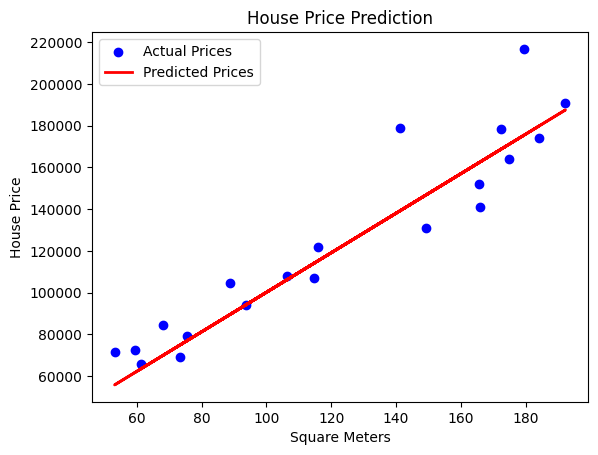

Model Coefficient (slope): 946.49
Model Intercept: 5533.95


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate random square meters (features) between 50 and 200 for 100 houses
X = np.random.uniform(50, 200, 100).reshape(-1, 1)

# Generate house prices with a base price of 1000 per square meter and added noise
# Price formula: price = 1000 * square_meters + noise
noise = np.random.normal(0, 20000, 100)
y = 1000 * X.flatten() + noise

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel("Square Meters")
plt.ylabel("House Price")
plt.title("House Price Prediction")
plt.legend()
plt.show()

# Print the model coefficients
print(f"Model Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


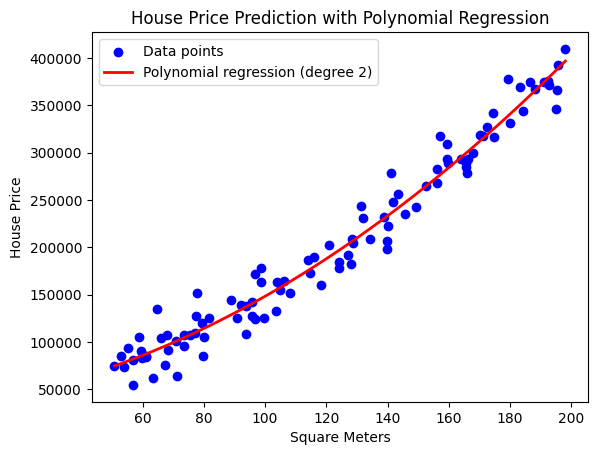

Model coefficients: [  0.         430.43407687   7.06600428]
Model intercept: 34541.33982375995


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Set random seed for reproducibility
np.random.seed(42)

# Generate random square meters between 50 and 200 for 100 houses
X = np.random.uniform(50, 200, 100).reshape(-1, 1)

# Generate house prices using a quadratic relationship plus noise
# For instance: price = 1000 * square_meters + 5 * (square_meters^2) + noise
noise = np.random.normal(0, 20000, 100)
y = 1000 * X.flatten() + 5 * (X.flatten() ** 2) + noise

# Transform the features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create a range of values for smooth curve visualization
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the original data and the polynomial regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial regression (degree 2)')
plt.xlabel("Square Meters")
plt.ylabel("House Price")
plt.title("House Price Prediction with Polynomial Regression")
plt.legend()
plt.show()

# Print model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


## Clasification

**Classification Thematic Explanation**

In **regression**, the goal is to predict a **continuous** value, like a house price or tumor volume. By contrast, in **classification**, the goal is to predict a **category** (or class) from a small set of possible labels. For instance, in a **breast cancer detection** scenario, you may use features such as **tumor size** and **patient age** to classify a tumor as **benign** or **malignant**.

1. **Small Number of Outputs**: Classification tasks have discrete outputs, such as 0 or 1, or multiple classes (e.g., Type 1 vs. Type 2 malignant).
2. **Decision Boundary**: In a two-feature scenario, data can be plotted on a 2D plane. A classifier learns a boundary (or boundaries) that separate different classes (e.g., malignant vs. benign).
3. **Evaluation Metrics**: You measure how well your model generalizes using metrics like **accuracy**, **precision**, **recall**, and **F1-score**.
4. **Model Examples**: Common classification models include **Logistic Regression**, **Support Vector Machines (SVM)**, **Decision Trees**, **Random Forests**, and **Neural Networks**.

---

**Python Code for Classification Example**

Below is a short code example in Python using **Logistic Regression** from `scikit-learn`. We:

1. Generate synthetic data for “Age” and “Tumor Size”.
2. Label points as benign (0) or malignant (1).
3. Train a logistic regression model.
4. Visualize the decision boundary.


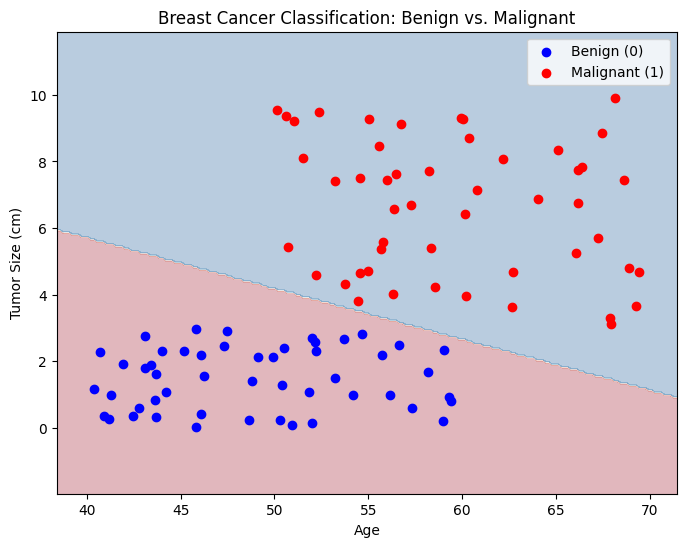

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data
# --------------------------
np.random.seed(42)

# Benign tumors (class 0): Age ~ 40-60, Tumor size ~ 0-3 cm
age_benign = 40 + 20 * np.random.rand(50)
size_benign = 3 * np.random.rand(50)

# Malignant tumors (class 1): Age ~ 50-70, Tumor size ~ 3-10 cm
age_malignant = 50 + 20 * np.random.rand(50)
size_malignant = 3 + 7 * np.random.rand(50)

# Combine the data
X_benign = np.column_stack((age_benign, size_benign))
X_malignant = np.column_stack((age_malignant, size_malignant))
X = np.vstack((X_benign, X_malignant))

y_benign = np.zeros(50, dtype=int)
y_malignant = np.ones(50, dtype=int)
y = np.concatenate((y_benign, y_malignant))

# 2. Train the logistic regression model
# --------------------------------------
model = LogisticRegression()
model.fit(X, y)

# 3. Create a grid to plot the decision boundary
# ----------------------------------------------
age_min, age_max = X[:, 0].min() - 2, X[:, 0].max() + 2
size_min, size_max = X[:, 1].min() - 2, X[:, 1].max() + 2

age_range = np.linspace(age_min, age_max, 200)
size_range = np.linspace(size_min, size_max, 200)
age_grid, size_grid = np.meshgrid(age_range, size_range)
grid_points = np.c_[age_grid.ravel(), size_grid.ravel()]

# Predict the class for each point in the grid
Z = model.predict(grid_points)
Z = Z.reshape(age_grid.shape)

# 4. Plot the results
# -------------------
plt.figure(figsize=(8, 6))

# Plot the decision boundary
plt.contourf(age_grid, size_grid, Z, alpha=0.3, cmap='RdBu')

# Plot the training data points
plt.scatter(X_benign[:, 0], X_benign[:, 1], color='blue', label='Benign (0)')
plt.scatter(X_malignant[:, 0], X_malignant[:, 1], color='red', label='Malignant (1)')

plt.xlabel("Age")
plt.ylabel("Tumor Size (cm)")
plt.title("Breast Cancer Classification: Benign vs. Malignant")
plt.legend()
plt.show()


**Explanation of Key Steps**

1. **Data Generation**  
   - We create two clusters of points: one represents benign tumors (smaller size, moderate age), the other represents malignant tumors (larger size, higher age).

2. **Model Training**  
   - We use **logistic regression** to perform binary classification.

3. **Decision Boundary**  
   - A grid of points is created, and each point is classified by the trained model. We then visualize these predictions to show how the model separates benign and malignant data.

4. **Plotting**  
   - We overlay the decision boundary on the original data (blue = benign, red = malignant).

---

**Conclusion**

Classification enables the prediction of discrete outcomes—like benign vs. malignant—based on relevant features (here, **Age** and **Tumor Size**). By training on labeled examples, the model can predict whether new, unseen data indicates a benign or malignant tumor, assisting in more accurate and early diagnosis.


# Unsupervised learning

## Clustering

Clustering is an unsupervised machine learning technique used to group similar data points together. It helps reveal hidden patterns or structures in your data without the need for pre-assigned labels.



### Key Concepts

- **Clustering Definition:**  
  Partitioning a dataset into groups (clusters) so that data points within the same cluster are more similar to each other than to those in other clusters.

- **Similarity Metrics:**  
  Similarity is commonly measured using distance metrics such as Euclidean or Manhattan distance.

**Common Clustering Algorithms**
- **K-Means Clustering:**  
  Divides the dataset into *k* clusters by minimizing the variance within each cluster through iterative assignment and update steps.

- **Hierarchical Clustering:**  
  Builds a dendrogram to represent data grouping in a tree-like structure, which can be formed using agglomerative (bottom-up) or divisive (top-down) methods.

- **Density-Based Clustering (e.g., DBSCAN):**  
  Forms clusters based on areas of high density, allowing detection of clusters of arbitrary shapes and handling noise effectively.

- **Gaussian Mixture Models (GMM):**  
  Assumes data is generated from a mixture of Gaussian distributions, offering a probabilistic approach to clustering where each data point has a likelihood of belonging to each cluster.

**Evaluating Clustering Quality**

- **Silhouette Score:**  
  Evaluates how similar an object is to its own cluster compared to other clusters.

- **Davies-Bouldin Index:**  
  Lower scores indicate better separation between clusters.

- **Within-Cluster Sum of Squares (WCSS):**  
  Often used with the elbow method to choose the optimal number of clusters.

**Applications**

- Market segmentation, image segmentation, anomaly detection, and document clustering are some of the many areas where clustering is applied.

**Challenges**

- Determining the right number of clusters.
- Handling scalability with large datasets.
- Addressing assumptions about cluster shape (e.g., spherical clusters in K-means).


Cluster Labels: [1 1 1 0 0 0]
Centroids:
 [[10.  2.]
 [ 1.  2.]]


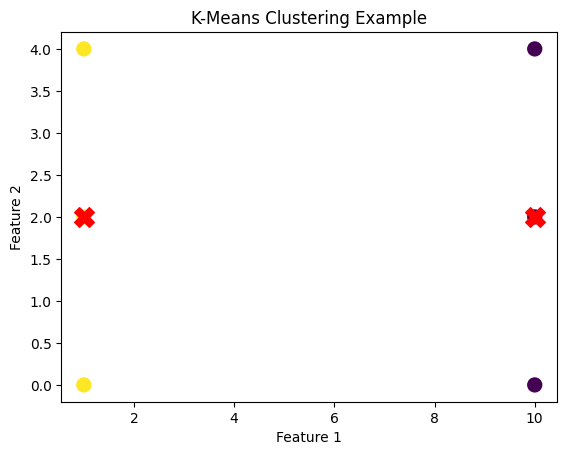

In [6]:
# Python Code for K-Means Clustering Example

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data: two clusters in 2D space
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Retrieve labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print cluster labels and centroids
print("Cluster Labels:", labels)
print("Centroids:\n", centroids)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Anomaly detection
Find unusual data points (Fraud detection in financial systems)

## Dimensionality reduction
Compress data using fewer numbers (compress big data set while loosing as little information as possible )